Task-1

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tanvithgulla","key":"c0ce27c82260de5be7c3ca57b7665a63"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets list -s drowsiness


ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
prasadvpatil/mrl-dataset                                     Drowsiness Detection Dataset                           23685003  2020-12-22 08:20:39.753000           8982         86  0.875            
hazemfahmy/openned-closed-eyes                               Drowsiness Detection Dataset                          551803258  2023-07-20 13:09:08.037000           2560         50  1.0              
kutaykutlu/drowsiness-detection                              Drowsiness Detection                                  188465583  2021-02-14 19:06:50.363000           2650         39  0.5625           
ismailnasr

In [ ]:
!kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd


Dataset URL: https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd
License(s): unknown
 98% 2.52G/2.58G [00:10<00:00, 533MB/s]
100% 2.58G/2.58G [00:10<00:00, 274MB/s]


In [ ]:
!unzip driver-drowsiness-dataset-ddd.zip -d ddd_dataset


Streaming output truncated to the last 5000 lines.
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0082.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0083.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0084.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0085.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0086.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0087.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0088.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0089.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0090.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0091.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0092.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y

In [ ]:
!ls ddd_dataset


'Driver Drowsiness Dataset (DDD)'


In [ ]:
import os

def count_images(folder):
    total = 0
    for path, dirs, files in os.walk(folder):
        total += len([file for file in files if file.endswith('.jpg') or file.endswith('.png')])
    return total

print("Total Images:", count_images("ddd_dataset"))


Total Images: 41793


In [ ]:
!apt install tree
!tree ddd_dataset -d


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
ddd_dataset
└── Driver Drowsiness Dataset (DDD)
    ├── Drowsy
    └── Non Drowsy

3 directories


In [ ]:
import os

drowsy_path = "ddd_dataset/Driver Drowsiness Dataset (DDD)/Drowsy"
print(os.listdir(drowsy_path))


['ZC0818.png', 'G0201.png', 'A0991.png', 'Q0127.png', 'A1139.png', 'C0281.png', 'X0040.png', 'S0306.png', 'L0597.png', 'P0840.png', 'P0396.png', 'N0018.png', 'A0642.png', 'E0348.png', 'M0526.png', 'N0927.png', 'Q0328.png', 'ZC0151.png', 'O0023.png', 'W0455.png', 'U0478.png', 'T0521.png', 'K0194.png', 'ZC0098.png', 'I1089.png', 'B0230.png', 'M0614.png', 'Y0553.png', 'J0037.png', 'W0224.png', 'X1299.png', 'A0705.png', 'L0796.png', 'N0962.png', 'Y0191.png', 'M0078.png', 'ZC0927.png', 'O0732.png', 'Y1188.png', 'T0831.png', 'X1484.png', 'V0365.png', 'A0172.png', 'E0308.png', 'I1227.png', 'A1221.png', 'Y1229.png', 'R0181.png', 'R0055.png', 'U0362.png', 'E0123.png', 'P0133.png', 'X0454.png', 'ZA0100.png', 'T0157.png', 'I0155.png', 'T0605.png', 'X1250.png', 'X0697.png', 'P1007.png', 'T0376.png', 'V0042.png', 'T0384.png', 'P0347.png', 'ZC0878.png', 'ZB0811.png', 'L0751.png', 'X0990.png', 'B0011.png', 'O1315.png', 'P0530.png', 'I1198.png', 'A1000.png', 'F0114.png', 'A0332.png', 'ZC0899.png', 'L0

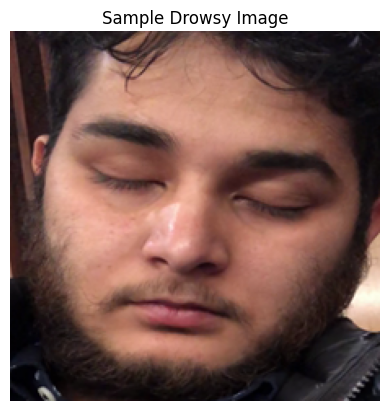

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "ddd_dataset/Driver Drowsiness Dataset (DDD)/Drowsy/P0650.png"
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title("Sample Drowsy Image")
plt.axis('off')
plt.show()


In [ ]:
import os
print("Classes:", os.listdir("ddd_dataset"))


Classes: ['Driver Drowsiness Dataset (DDD)']


Task-2

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_size = (224, 224)
batch_size = 32

data_dir = '/content/ddd_dataset'
train_dir = os.path.join(data_dir, 'Driver Drowsiness Dataset (DDD)/Drowsy')
val_dir = os.path.join(data_dir, 'Driver Drowsiness Dataset (DDD)/Non Drowsy')


In [ ]:
print("Drowsy:", len(os.listdir(train_dir)))
print("Non Drowsy:", len(os.listdir(val_dir)))


Drowsy: 22348
Non Drowsy: 19445


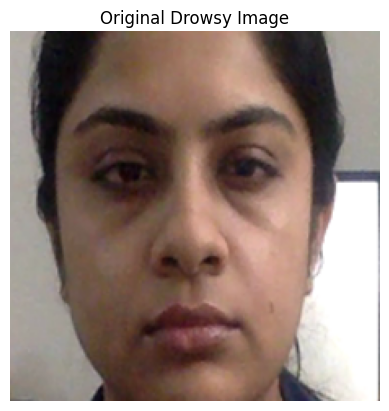

In [ ]:
sample_img_path = os.path.join(train_dir, os.listdir(train_dir)[0])
img = tf.keras.preprocessing.image.load_img(sample_img_path)
plt.imshow(img)
plt.title("Original Drowsy Image")
plt.axis('off')
plt.show()


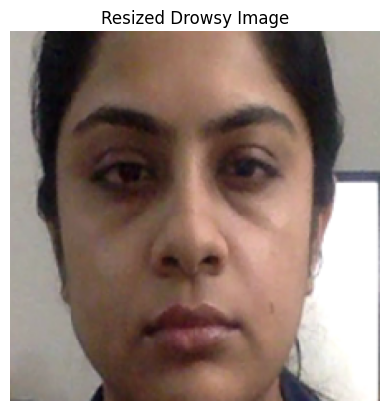

In [ ]:
img_array = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=img_size)
plt.imshow(img_array)
plt.title("Resized Drowsy Image")
plt.axis('off')
plt.show()


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_directory(
    data_dir + '/Driver Drowsiness Dataset (DDD)',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 41793 images belonging to 2 classes.


In [ ]:
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [ ]:
train_aug_gen = augmented_datagen.flow_from_directory(
    data_dir + '/Driver Drowsiness Dataset (DDD)',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 41793 images belonging to 2 classes.


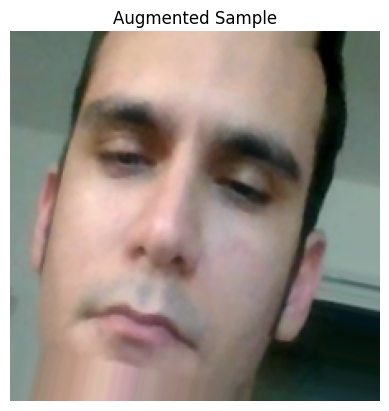

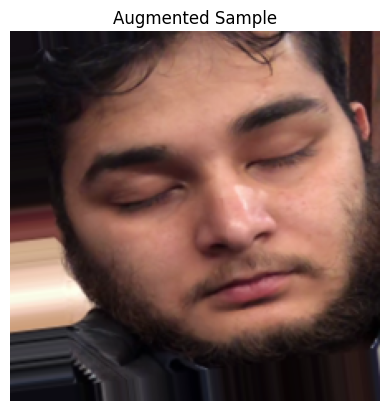

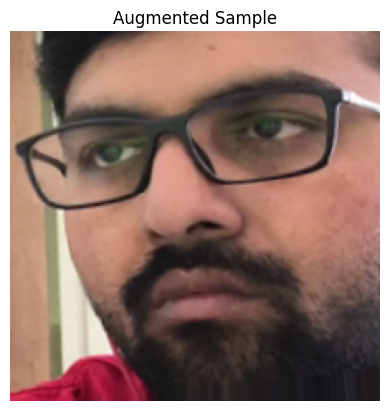

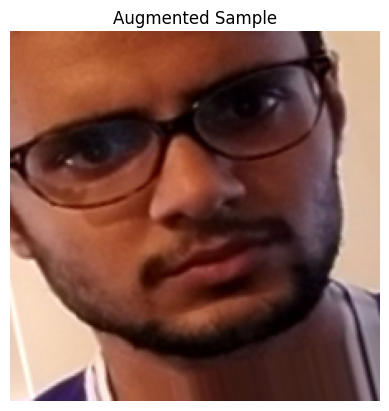

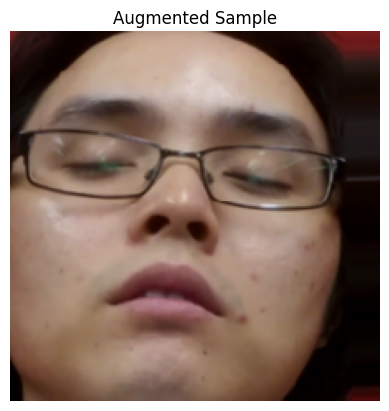

In [ ]:
x_batch, y_batch = next(train_aug_gen)
for i in range(5):
    plt.imshow(x_batch[i])
    plt.axis('off')
    plt.title("Augmented Sample")
    plt.show()


In [ ]:
print("Task-2 complete: Loaded, resized, and augmented dataset is ready for training.")


Task-2 complete: Loaded, resized, and augmented dataset is ready for training.


Task-3

In [ ]:
import os
import shutil
import random


In [ ]:
original_data_dir = '/content/ddd_dataset/Driver Drowsiness Dataset (DDD)'
classes = ['Drowsy', 'Non Drowsy']


In [ ]:
base_dir = '/content/split_dataset_70_15_15'
splits = ['train', 'val', 'test']

for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)


In [ ]:
def split_data(source_dir, train_dir, val_dir, test_dir):
    files = [f for f in os.listdir(source_dir) if f.endswith('.png') or f.endswith('.jpg')]
    random.shuffle(files)
    total = len(files)
    train_end = int(0.7 * total)
    val_end = train_end + int(0.15 * total)

    for i, file in enumerate(files):
        src = os.path.join(source_dir, file)
        if i < train_end:
            dst = os.path.join(train_dir, file)
        elif i < val_end:
            dst = os.path.join(val_dir, file)
        else:
            dst = os.path.join(test_dir, file)
        shutil.copy(src, dst)


In [ ]:
for cls in classes:
    src = os.path.join(original_data_dir, cls)
    split_data(
        src,
        os.path.join(base_dir, 'train', cls),
        os.path.join(base_dir, 'val', cls),
        os.path.join(base_dir, 'test', cls)
    )


In [ ]:
print("Folders created under:", base_dir)
for split in splits:
    print(split, ":", os.listdir(os.path.join(base_dir, split)))


Folders created under: /content/split_dataset_70_15_15
train : ['Non Drowsy', 'Drowsy']
val : ['Non Drowsy', 'Drowsy']
test : ['Non Drowsy', 'Drowsy']


In [ ]:
for cls in classes:
    count = len(os.listdir(os.path.join(base_dir, 'train', cls)))
    print(f"Train - {cls}: {count} images")


Train - Drowsy: 15643 images
Train - Non Drowsy: 13611 images


In [ ]:
for split in ['val', 'test']:
    for cls in classes:
        count = len(os.listdir(os.path.join(base_dir, split, cls)))
        print(f"{split.capitalize()} - {cls}: {count} images")


Val - Drowsy: 3352 images
Val - Non Drowsy: 2916 images
Test - Drowsy: 3353 images
Test - Non Drowsy: 2918 images


In [ ]:
sample = os.listdir(os.path.join(base_dir, 'train', 'Drowsy'))[0]
print("Sample file:", sample)


Sample file: A1139.png


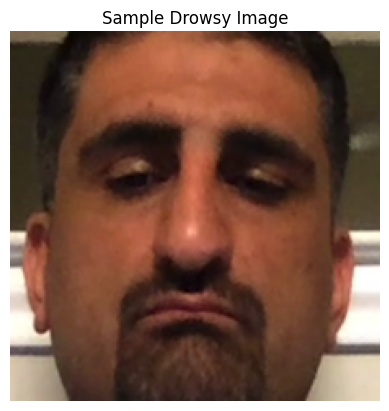

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = os.path.join(base_dir, 'train', 'Drowsy', sample)
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title("Sample Drowsy Image")
plt.axis('off')
plt.show()


Task-4

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_size = (224, 224)
batch_size = 32

train_dir = "/content/split_dataset_70_15_15/train"
val_dir = "/content/split_dataset_70_15_15/val"
test_dir = "/content/split_dataset_70_15_15/test"


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 29254 images belonging to 2 classes.
Found 6268 images belonging to 2 classes.
Found 6271 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 112s 115ms/step - accuracy: 0.9114 - loss: 0.2874 - val_accuracy: 0.9986 - val_loss: 0.0051
Epoch 2/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 103s 113ms/step - accuracy: 0.9979 - loss: 0.0099 - val_accuracy: 0.9974 - val_loss: 0.0107
Epoch 3/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 103s 112ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9971 - val_loss: 0.0072
Epoch 4/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 102s 112ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9989 - val_loss: 0.0026
Epoch 5/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 102s 111ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9971 - val_loss: 0.0165


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9975 - loss: 0.0149
Test Accuracy: 1.00


In [ ]:
model.save("baseline_cnn_model.h5")


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step
              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3353
  Non Drowsy       1.00      1.00      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



Task-5

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


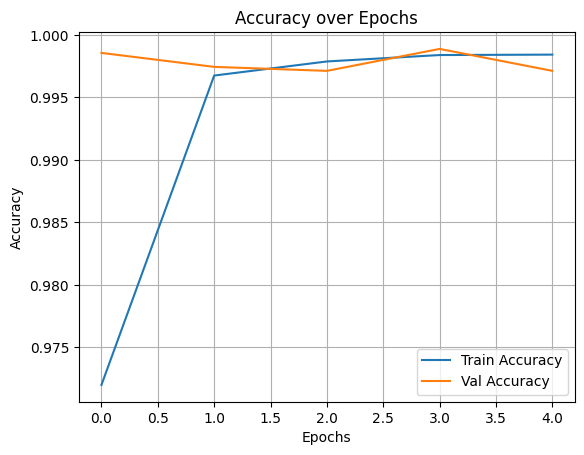

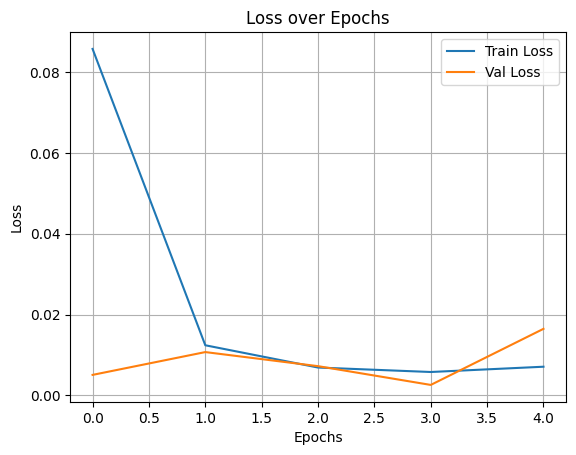

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step


In [ ]:
print("Predicted classes:", y_pred_classes[:5])
print("True classes:", y_true[:5])


Predicted classes: [0 0 0 0 0]
True classes: [0 0 0 0 0]


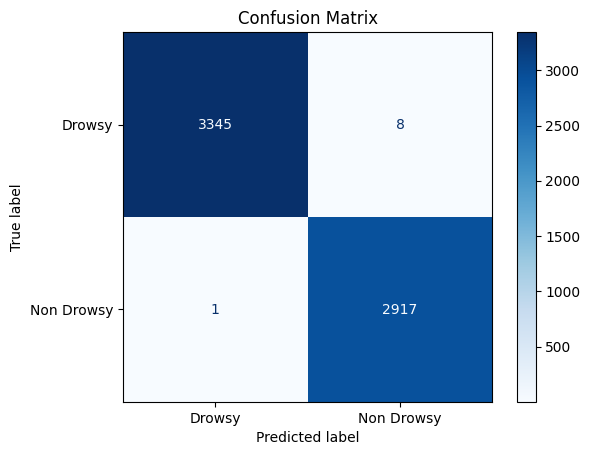

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3353
  Non Drowsy       1.00      1.00      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.9975 - loss: 0.0149
Test Loss: 0.0073
Test Accuracy: 0.9986


In [ ]:
print("Class indices:", test_generator.class_indices)


Class indices: {'Drowsy': 0, 'Non Drowsy': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step


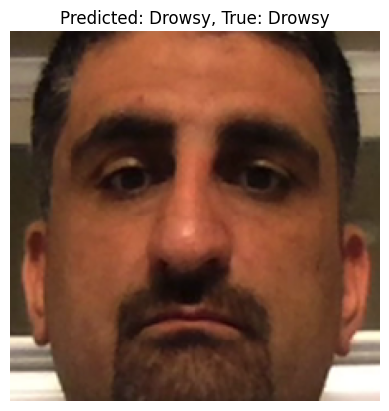

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


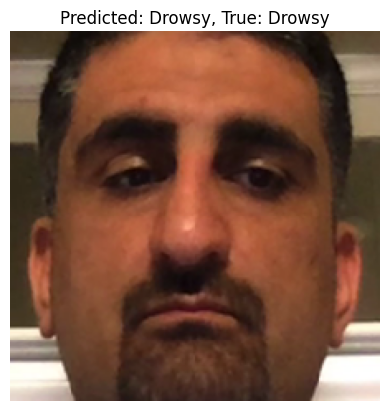

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


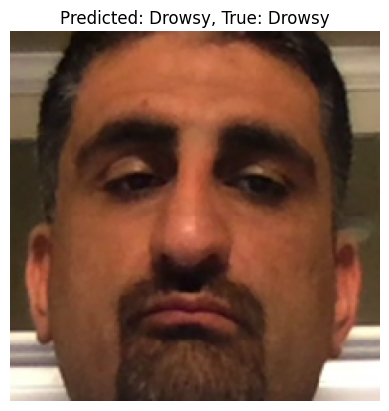

In [ ]:
x_test, y_test = next(test_generator)

for i in range(3):
    img = x_test[i]
    true_label = np.argmax(y_test[i])
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[pred_label]}, True: {class_labels[true_label]}")
    plt.axis('off')
    plt.show()


Task-6

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history_resnet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 130s 129ms/step - accuracy: 0.5448 - loss: 0.7313 - val_accuracy: 0.6543 - val_loss: 0.6379
Epoch 2/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 108s 118ms/step - accuracy: 0.6364 - loss: 0.6401 - val_accuracy: 0.6602 - val_loss: 0.6151
Epoch 3/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 103s 112ms/step - accuracy: 0.6493 - loss: 0.6213 - val_accuracy: 0.6790 - val_loss: 0.5981
Epoch 4/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 102s 112ms/step - accuracy: 0.6691 - loss: 0.6014 - val_accuracy: 0.6779 - val_loss: 0.5785
Epoch 5/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 102s 111ms/step - accuracy: 0.6824 - loss: 0.5859 - val_accuracy: 0.7195 - val_loss: 0.5700
Epoch 6/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 103s 112ms/step - accuracy: 0.7041 - loss: 0.5661 - val_accuracy: 0.7443 - val_loss: 0.5387
Epoch 7/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 102s 111ms/step - accuracy: 0.7247 - loss: 0.5480 - val_accuracy: 0.7613 - val_loss: 0.5179
Epoch 8/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 101s 111ms/step - accuracy: 0.7382 -

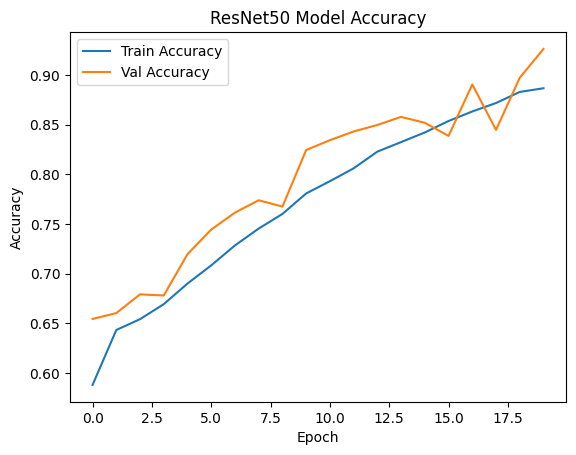

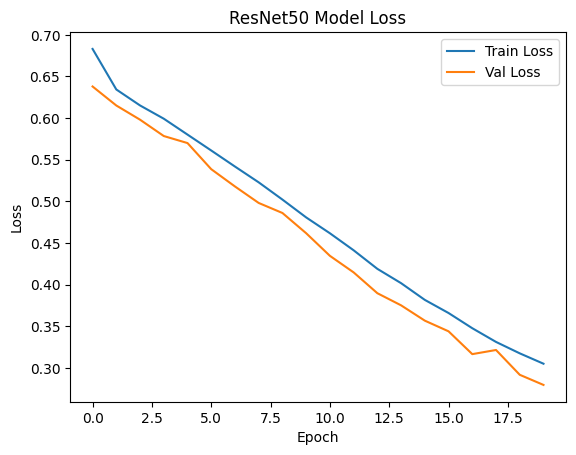

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('ResNet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("resnet50_transfer_model.h5")


Task-7

In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
for layer in base_model.layers[-30:]:
    layer.trainable = True


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 150s 145ms/step - accuracy: 0.9436 - loss: 0.8208 - val_accuracy: 0.9955 - val_loss: 0.0300
Epoch 2/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 123s 134ms/step - accuracy: 0.9868 - loss: 0.0801 - val_accuracy: 0.9982 - val_loss: 0.0076
Epoch 3/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 123s 134ms/step - accuracy: 0.9950 - loss: 0.0216 - val_accuracy: 0.9990 - val_loss: 0.0039
Epoch 4/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 122s 134ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9544 - val_loss: 0.1403
Epoch 5/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 122s 133ms/step - accuracy: 0.9885 - loss: 0.0500 - val_accuracy: 0.9982 - val_loss: 0.0072


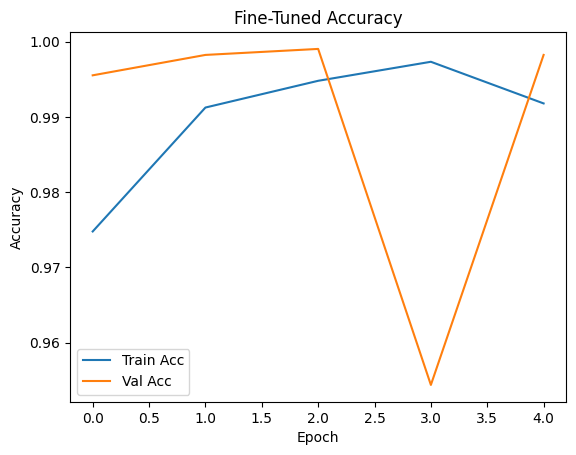

In [ ]:
plt.plot(history_finetune.history['accuracy'], label='Train Acc')
plt.plot(history_finetune.history['val_accuracy'], label='Val Acc')
plt.title('Fine-Tuned Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


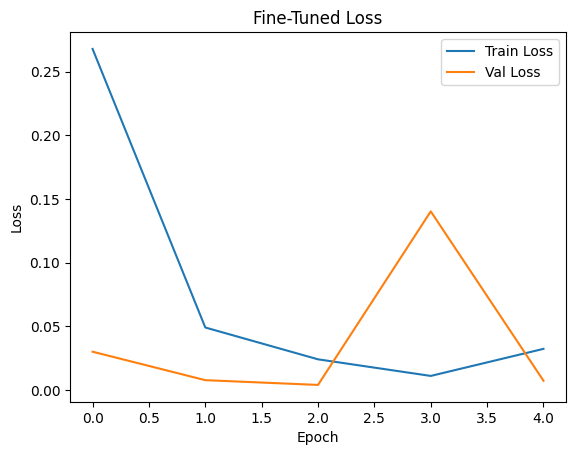

In [ ]:
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Val Loss')
plt.title('Fine-Tuned Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_pred_resnet = model.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_resnet = test_generator.classes


196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step


In [ ]:
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true_resnet, y_pred_classes_resnet, target_names=class_labels))


              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3353
  Non Drowsy       1.00      1.00      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



In [ ]:
model.save("resnet50_finetuned_model.h5")


Task-8

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in mobilenet_base.layers:
    layer.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

mobilenet_model = Model(inputs=mobilenet_base.input, outputs=predictions)


In [ ]:
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


In [ ]:
history_mobilenet = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 116s 117ms/step - accuracy: 0.7430 - loss: 0.5126 - val_accuracy: 0.9837 - val_loss: 0.0918
Epoch 2/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 98s 107ms/step - accuracy: 0.9436 - loss: 0.1615 - val_accuracy: 0.9904 - val_loss: 0.0438
Epoch 3/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 99s 108ms/step - accuracy: 0.9617 - loss: 0.1127 - val_accuracy: 0.9935 - val_loss: 0.0284
Epoch 4/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 103s 113ms/step - accuracy: 0.9714 - loss: 0.0852 - val_accuracy: 0.9957 - val_loss: 0.0196
Epoch 5/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 99s 108ms/step - accuracy: 0.9793 - loss: 0.0663 - val_accuracy: 0.9971 - val_loss: 0.0123


In [ ]:
test_loss, test_acc = mobilenet_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9985 - loss: 0.0089
Test Accuracy: 99.79%


In [ ]:
y_pred_mobilenet = mobilenet_model.predict(test_generator)
y_pred_classes_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
y_true_mobilenet = test_generator.classes

from sklearn.metrics import classification_report

print(classification_report(y_true_mobilenet, y_pred_classes_mobilenet, target_names=class_labels))


196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step
              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3353
  Non Drowsy       1.00      1.00      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



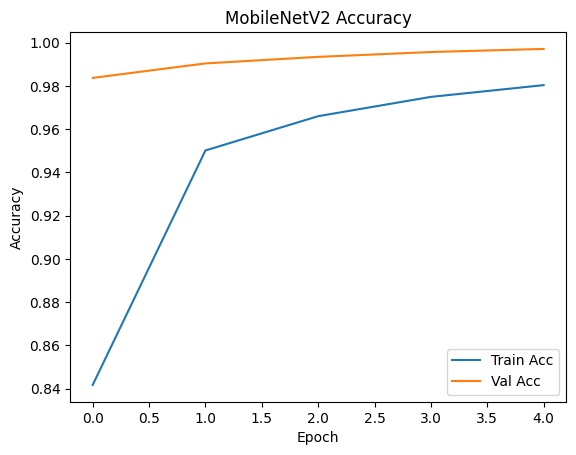

In [ ]:
plt.plot(history_mobilenet.history['accuracy'], label='Train Acc')
plt.plot(history_mobilenet.history['val_accuracy'], label='Val Acc')
plt.title('MobileNetV2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


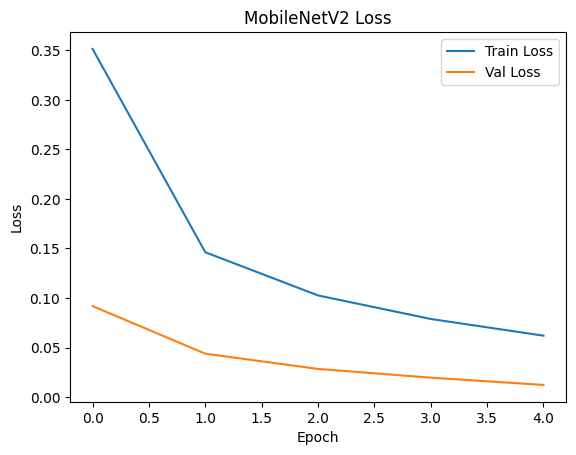

In [ ]:
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Val Loss')
plt.title('MobileNetV2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
mobilenet_model.save("mobilenetv2_finetuned_model.h5")


Task-9

In [ ]:
!pip install -q transformers


In [ ]:
import tensorflow as tf
import numpy as np
import os
from transformers import ViTFeatureExtractor, TFViTForImageClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image


In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

vit_model = TFViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=2
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def load_images_from_folder(folder, label, feature_extractor, limit=None):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            image = Image.open(img_path).convert("RGB").resize((224, 224))
            img_array = feature_extractor(images=image, return_tensors="np")['pixel_values'][0]
            images.append(img_array)
            labels.append(label)
            count += 1
            if limit and count >= limit:
                break
    return images, labels


In [ ]:
limit = 1000

train_drowsy, label_drowsy = load_images_from_folder('/content/split_dataset_70_15_15/train/Drowsy', 1, feature_extractor, limit)
train_non, label_non = load_images_from_folder('/content/split_dataset_70_15_15/train/Non Drowsy', 0, feature_extractor, limit)

X_train = tf.convert_to_tensor(train_drowsy + train_non)
y_train = tf.keras.utils.to_categorical(label_drowsy + label_non, num_classes=2)


In [ ]:
val_drowsy, label_val_drowsy = load_images_from_folder('/content/split_dataset_70_15_15/val/Drowsy', 1, feature_extractor, limit)
val_non, label_val_non = load_images_from_folder('/content/split_dataset_70_15_15/val/Non Drowsy', 0, feature_extractor, limit)

X_val = tf.convert_to_tensor(val_drowsy + val_non)
y_val = tf.keras.utils.to_categorical(label_val_drowsy + label_val_non, num_classes=2)


In [ ]:
from transformers import create_optimizer

optimizer, schedule = create_optimizer(
    init_lr=3e-5,
    num_warmup_steps=0,
    num_train_steps=100
)

vit_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_vit = vit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=16
)


Epoch 1/5
125/125 [==============================] - 135s 826ms/step - loss: 1.1344 - accuracy: 0.2380 - val_loss: 0.8446 - val_accuracy: 0.1575
Epoch 2/5
125/125 [==============================] - 101s 811ms/step - loss: 0.9326 - accuracy: 0.1410 - val_loss: 0.8446 - val_accuracy: 0.1575
Epoch 3/5
125/125 [==============================] - 101s 812ms/step - loss: 0.9326 - accuracy: 0.1410 - val_loss: 0.8446 - val_accuracy: 0.1575
Epoch 4/5
125/125 [==============================] - 101s 811ms/step - loss: 0.9326 - accuracy: 0.1410 - val_loss: 0.8446 - val_accuracy: 0.1575
Epoch 5/5
125/125 [==============================] - 101s 811ms/step - loss: 0.9326 - accuracy: 0.1410 - val_loss: 0.8446 - val_accuracy: 0.1575


In [ ]:
test_drowsy, label_test_drowsy = load_images_from_folder('/content/split_dataset_70_15_15/test/Drowsy', 1, feature_extractor, limit)
test_non, label_test_non = load_images_from_folder('/content/split_dataset_70_15_15/test/Non Drowsy', 0, feature_extractor, limit)

X_test = tf.convert_to_tensor(test_drowsy + test_non)
y_test = tf.keras.utils.to_categorical(label_test_drowsy + label_test_non, num_classes=2)

test_loss, test_acc = vit_model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


63/63 [==============================] - 29s 417ms/step - loss: 0.9274 - accuracy: 0.1590

Test Loss: 0.9274, Test Accuracy: 0.1590


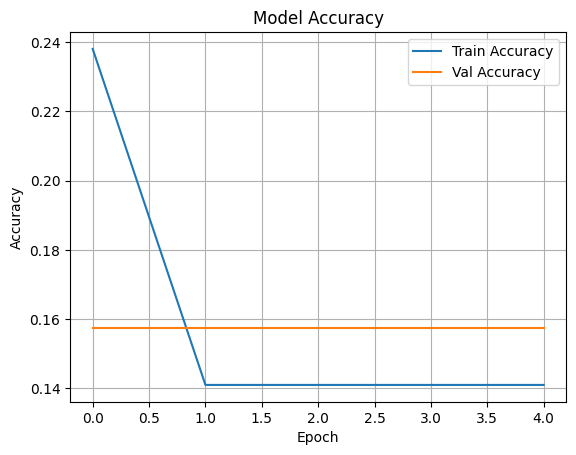

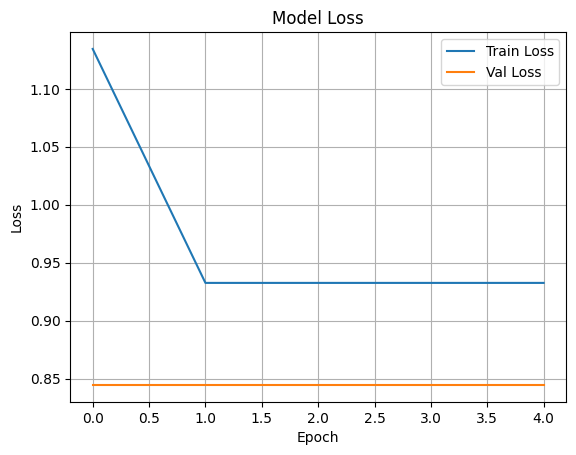

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_vit.history['accuracy'], label='Train Accuracy')
plt.plot(history_vit.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history_vit.history['loss'], label='Train Loss')
plt.plot(history_vit.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
test_loss, test_acc = vit_model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


63/63 [==============================] - 27s 422ms/step - loss: 0.9274 - accuracy: 0.1590

Test Loss: 0.9274
Test Accuracy: 0.1590


In [ ]:
y_pred = vit_model.predict(X_test)
y_pred_labels = np.argmax(y_pred.logits, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=['Non Drowsy', 'Drowsy']))


63/63 [==============================] - 29s 412ms/step
              precision    recall  f1-score   support

  Non Drowsy       0.19      0.21      0.20      1000
      Drowsy       0.12      0.10      0.11      1000

    accuracy                           0.16      2000
   macro avg       0.15      0.16      0.16      2000
weighted avg       0.15      0.16      0.16      2000



In [ ]:
vit_model.save_weights('vit_weights_only.h5')
print("Saved weights to vit_weights_only.h5")


Saved weights to vit_weights_only.h5


Task-10

196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step
63/63 [==============================] - 26s 418ms/step

Baseline CNN Performance:
Accuracy: 0.9989
Precision: 1.0000
Recall: 0.9976
F1 Score: 0.9988

ResNet50 Performance:
Accuracy: 0.9989
Precision: 1.0000
Recall: 0.9976
F1 Score: 0.9988

MobileNetV2 Performance:
Accuracy: 0.9979
Precision: 0.9990
Recall: 0.9966
F1 Score: 0.9978

Vision Transformer (ViT) Performance:
Accuracy: 0.1590
Precision: 0.1169
Recall: 0.1040
F1 Score: 0.1101


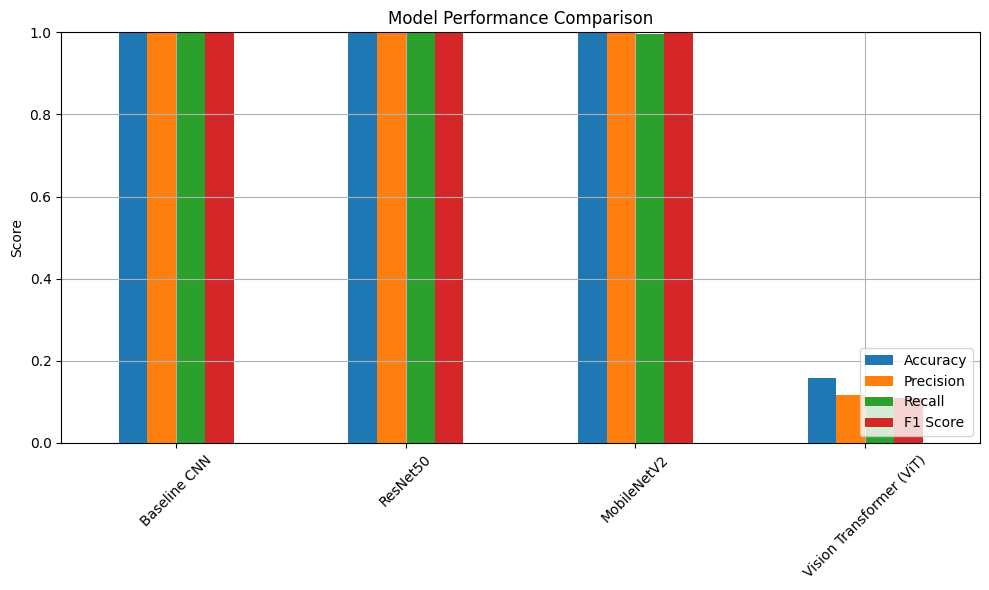

Saved model comparison to model_comparison_metrics.csv

 Best performing model: Baseline CNN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_true_cnn_based = test_generator.classes

y_pred_baseline = model.predict(test_generator)
y_pred_resnet = model.predict(test_generator)
y_pred_mobilenet = mobilenet_model.predict(test_generator)
y_pred_vit_logits = vit_model.predict(X_test)

y_pred_baseline = np.argmax(y_pred_baseline, axis=1)
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)
y_pred_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
y_pred_vit_classes = np.argmax(y_pred_vit_logits.logits, axis=1)

def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

y_true_vit = np.argmax(y_test, axis=1)


results = {
    "Baseline CNN": get_metrics(y_true_cnn_based, y_pred_baseline),
    "ResNet50": get_metrics(y_true_cnn_based, y_pred_resnet),
    "MobileNetV2": get_metrics(y_true_cnn_based, y_pred_mobilenet),
    "Vision Transformer (ViT)": get_metrics(y_true_vit, y_pred_vit_classes)
}

for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

df_results = pd.DataFrame(results).T


df_results.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

df_results.to_csv("model_comparison_metrics.csv")
print("Saved model comparison to model_comparison_metrics.csv")

best_model = df_results['F1 Score'].idxmax()
print(f"\n Best performing model: {best_model}")

In [ ]:
model.save("baseline_cnn_finetuned_best_model.h5")
print(" Saved the best performing model as baseline_cnn_finetuned_best_model.h5")

 Saved the best performing model as baseline_cnn_finetuned_best_model.h5


In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model("baseline_cnn_finetuned_best_model.h5")
print(" Loaded the best performing model: Baseline CNN")


 Loaded the best performing model: Baseline CNN


Task-11

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Drowsy', 'Drowsy'], yticklabels=['Non-Drowsy', 'Drowsy'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()


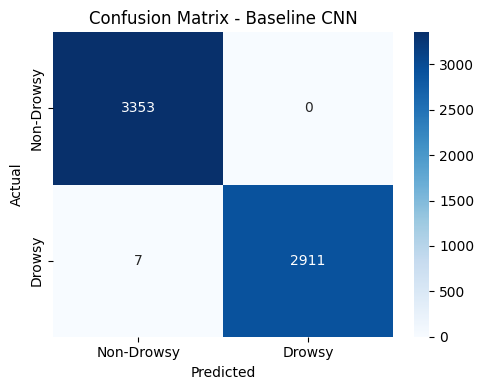

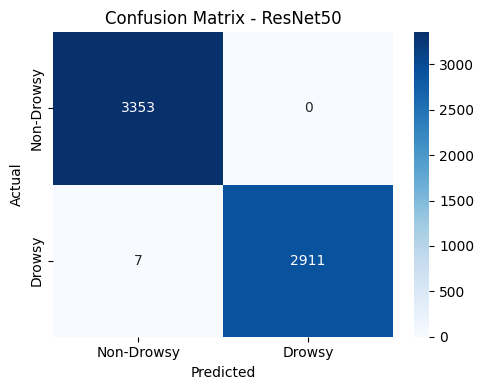

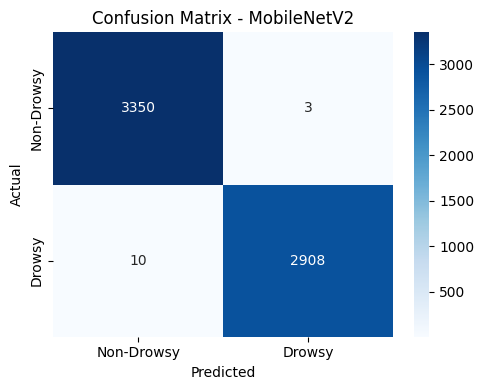

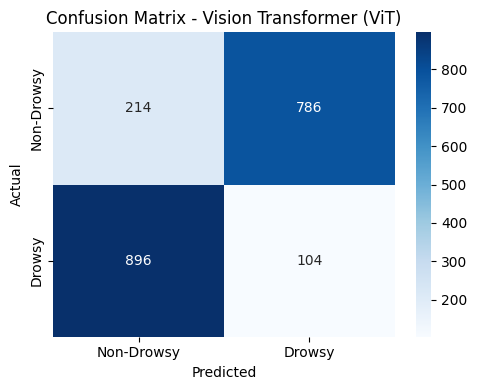

In [ ]:
plot_confusion(y_true_cnn_based, y_pred_baseline, "Baseline CNN")

plot_confusion(y_true_cnn_based, y_pred_resnet, "ResNet50")

plot_confusion(y_true_cnn_based, y_pred_mobilenet, "MobileNetV2")

plot_confusion(y_true_vit, y_pred_vit_classes, "Vision Transformer (ViT)")


In [ ]:
def save_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Non-Drowsy', 'Drowsy']

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_confusion.png")
    plt.close()

save_confusion(y_true_cnn_based, y_pred_baseline, "Baseline CNN")
save_confusion(y_true_cnn_based, y_pred_resnet, "ResNet50")
save_confusion(y_true_cnn_based, y_pred_mobilenet, "MobileNetV2")
save_confusion(y_true_vit, y_pred_vit_classes, "Vision Transformer (ViT)")

Task-12

In [ ]:
def plot_and_save_learning_curves(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_learning_curves.png")
    plt.show()


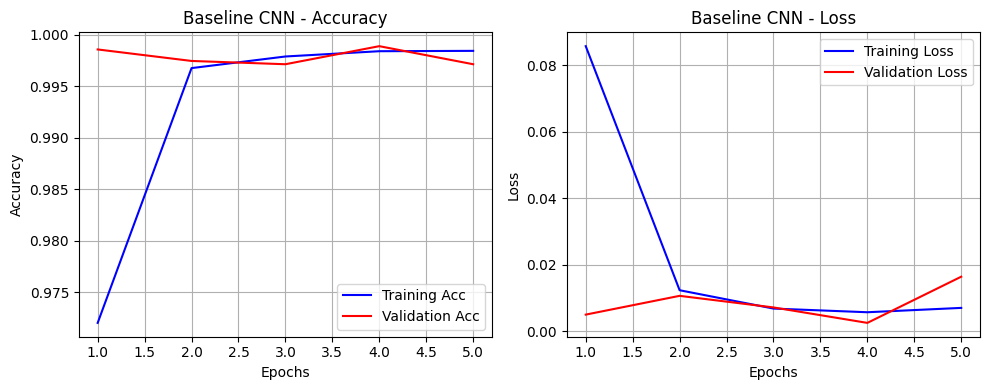

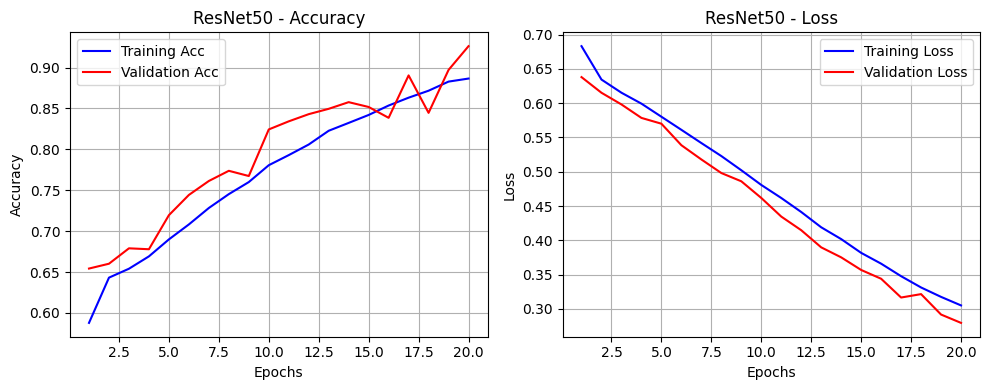

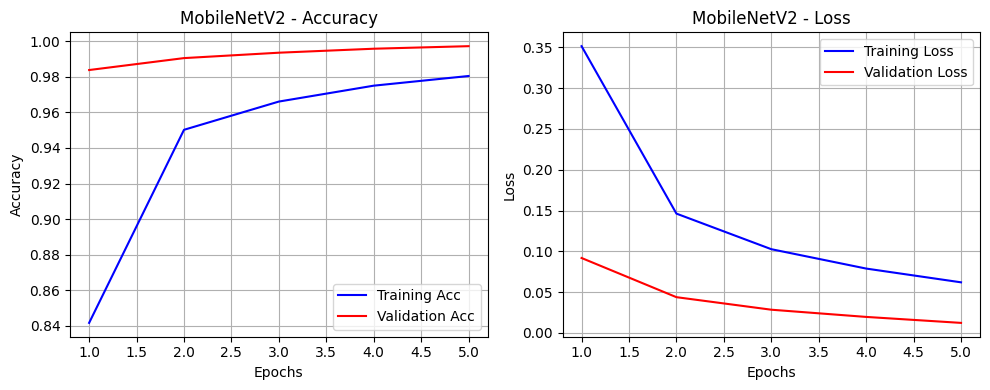

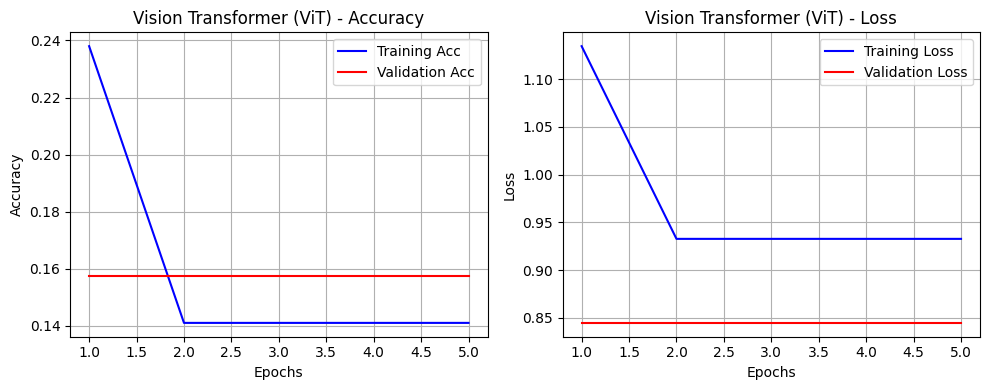

In [ ]:
plot_and_save_learning_curves(history, "Baseline CNN")
plot_and_save_learning_curves(history_resnet, "ResNet50")
plot_and_save_learning_curves(history_mobilenet, "MobileNetV2")
plot_and_save_learning_curves(history_vit, "Vision Transformer (ViT)")

**Contribution Summary**



| Team Member | Project Parts                            | Contribution (%) |
|-------------|-------------------------------------------|------------------|
| saitanvi    | Task-1, Task-4, Task-7, Task-10           | 33.3%            |
| hpeddire    | Task-2, Task-5, Task-8, Task-11           | 33.3%            |
| apallerl    | Task-3, Task-6, Task-9, Task-12           | 33.3%            |
|             | **Total**                                | **100%**         |
